# mljar-supervised: Data Analysis

### Resources:

- []()

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Data

In [2]:
## load data
data = datasets.load_iris()
df = pd.DataFrame(data= np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
df['target'] = df['target'].apply(lambda x: data['target_names'][int(x)])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
## split for train/test a model
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:3]], df[df.columns[4]], test_size=0.25, random_state=42)

## Extended EDA

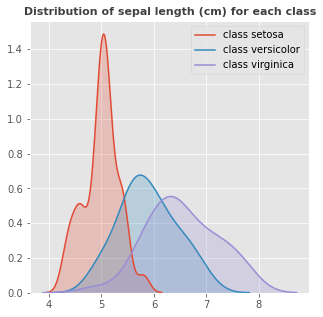

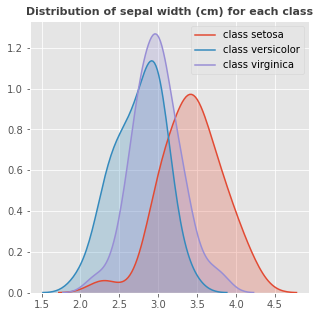

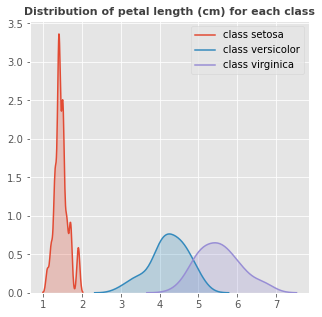

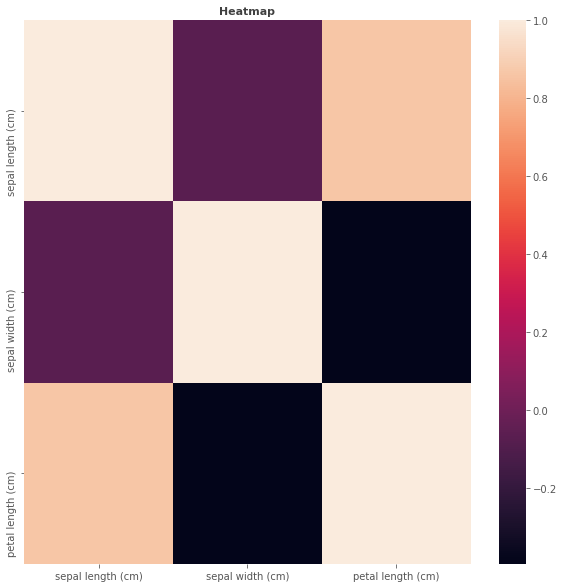

In [7]:
from supervised.preprocessing.eda import EDA

EDA.extensive_eda(X_train,y_train,save_path="outputs/")

## AutoML with "Explain" mode

In [15]:
from supervised.automl import AutoML
automl = AutoML(mode="Explain", explain_level=2)
automl.fit(X_train, y_train)

AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 1.098621 trained in 0.13 seconds
2_DecisionTree logloss 0.562188 trained in 5.92 seconds
3_Linear logloss 0.273527 trained in 4.8 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.307383 trained in 4.43 seconds
5_Default_NeuralNetwork logloss 0.870568 trained in 1.93 seconds
6_Default_RandomForest logloss 0.308094 trained in 5.8 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.193272 trained in 0.12 seconds
AutoML fit time: 25.79 seconds


AutoML(explain_level=2)